# Get MRI and IMC data

BMED360-2021

(**Re-download the files if needed**)

Download a large file from Google Drive using `gdown` (https://github.com/wkentaro/gdown).<br>
If you use curl/wget, it fails with a large file because of the security warning from Google Drive.

-----
THESE LINKS (for my own use) ARE TEMPORARY:<br>

Read (nested) JSON files into Pandas:
- https://stackoverflow.com/questions/49685924/extract-google-drive-zip-from-google-colab-notebook
- https://medium.datadriveninvestor.com/google-drive-data-directly-to-your-jupyter-otebook-without-authenticating-5a95e271bc89
- https://medium.com/swlh/converting-nested-json-structures-to-pandas-dataframes-e8106c59976e
- https://towardsdatascience.com/how-to-convert-json-into-a-pandas-dataframe-100b2ae1e0d8
- https://unix.stackexchange.com/questions/164602/how-to-output-the-directory-structure-to-json-format)
- https://stackoverflow.com/questions/48133080/how-to-download-a-google-drive-url-via-curl-or-wget

How to run a downloaded Jupyter notebook on Google Colaboratory?
- https://stackoverflow.com/questions/48961866/how-to-run-a-downloaded-jupyter-notebook-on-google-colaboratory
- https://towardsdatascience.com/conda-google-colab-75f7c867a522
- https://datascience.stackexchange.com/questions/75948/how-to-setup-and-run-conda-on-google-colab
- https://github.com/donaldsrepo/SampleNotebooks/blob/master/CondaCreateEnv/GoogleColabCondaCreateEnv.ipynb
- https://medium.com/analytics-vidhya/a-quick-workflow-for-google-colab-github-and-jupyter-notebooks-on-mac-ff5d004e01f
- https://www.kdnuggets.com/2020/06/google-colab-deep-learning.html
- https://towardsdatascience.com/google-drive-google-colab-github-dont-just-read-do-it-5554d5824228


- https://colab.research.google.com/notebooks/welcome.ipynb
- https://colab.research.google.com/notebooks/intro.ipynb
- https://colab.research.google.com/notebooks/io.ipynb
- https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb
- https://course.fast.ai/start_colab

To create a new Notebook on Colab, open https://colab.research.google.com/, and it will automatically show your previous notebooks and give an option to create a new notebook.

In [1]:
import os
import sys
import json
import errno
import zipfile
import pandas as pd
from pandas.core.common import flatten
import gdown
import shutil
import imageio
import matplotlib.pyplot as plt

# To display plots directly in the notebook:
%matplotlib inline

In [2]:
HOME = os.path.expanduser('~')

In [3]:
!which python # should return /usr/local/bin/python

/Users/arvid/opt/anaconda3/envs/bmed360v2021/bin/python


In [4]:
!python --version

Python 3.8.8


In [5]:
!echo $PYTHONPATH

## Import `data_info.json` from Google drive

In [6]:
#!gdown https://drive.google.com/file/d/10vazD4JDixYZb-uVclvdAMEg4cSKwIWR -O ./data/data_info.json

In [7]:
# https://drive.google.com/file/d/10vazD4JDixYZb-uVclvdAMEg4cSKwIWR/view?usp=sharing
file_id = '10vazD4JDixYZb-uVclvdAMEg4cSKwIWR'
url = 'https://drive.google.com/uc?id=%s' % file_id
output = './data/data_info.json'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=10vazD4JDixYZb-uVclvdAMEg4cSKwIWR
To: /Users/arvid/GitHub/computational-medicine/BMED360-2021/Lab1-MRI/data/data_info.json
100%|██████████| 1.83k/1.83k [00:00<00:00, 2.84MB/s]


'./data/data_info.json'

In [8]:
meta_file = './data/data_info.json'
meta_file

'./data/data_info.json'

In [9]:
with open(meta_file) as data_file:    
    meta = json.load(data_file)

In [10]:
meta

[{'modality': 'IMC',
  'source': 'Data (case 6126 E08) from Damond et al. Cell Metabolism 2019;29(3):755-768.e5.',
  'files': [{'name': 'table1_IMC_panel_37x4.csv', 'type': 'file'},
   {'name': 'E08_a0_full.csv', 'type': 'file'},
   {'name': 'E08_a0_full.tiff', 'type': 'file'}]},
 {'modality': 'MRI',
  'source': 'Data from Lundervold et al.',
  'files': [{'name': 'fisp_060.dcm', 'type': 'file'},
   {'name': 'psif_060.dcm', 'type': 'file'},
   {'name': 'fisp_060.nii.gz', 'type': 'file'},
   {'name': 'flash_060_training_mask_6cla.png', 'type': 'file'},
   {'name': 'multispectral_mri_training_data.csv', 'type': 'file'},
   {'name': 'mni_icbm152_t1_tal_nlin_sym_09c.nii.gz', 'type': 'file'},
   {'name': 'dess_060.dcm', 'type': 'file'},
   {'name': 'flash_060_brain_mask.png', 'type': 'file'},
   {'name': 'flash_060.nii.gz', 'type': 'file'},
   {'name': 'dess_060.nii.gz', 'type': 'file'},
   {'name': 'brain_roi_mask.nii.gz', 'type': 'file'},
   {'name': 'psif_060.nii.gz', 'type': 'file'},
   

In [11]:
modalcard = []
df = pd.json_normalize(meta)
frames = [pd.DataFrame(df.files[i]) for i in range(len(df['modality']))]
for i in range(len(df['modality'])):
    print(f'{df.modality[i]}: {len(df.files[i])} files')
    modalcard.append([df.modality[i]] * len(df.files[i]))

IMC: 3 files
MRI: 15 files


In [12]:
df_info = pd.concat(frames)
df_info['modality'] = list(flatten(modalcard))
df_info

,name,type,modality
0,table1_IMC_panel_37x4.csv,file,IMC
1,E08_a0_full.csv,file,IMC
2,E08_a0_full.tiff,file,IMC
0,fisp_060.dcm,file,MRI
1,psif_060.dcm,file,MRI
2,fisp_060.nii.gz,file,MRI
3,flash_060_training_mask_6cla.png,file,MRI
4,multispectral_mri_training_data.csv,file,MRI
5,mni_icbm152_t1_tal_nlin_sym_09c.nii.gz,file,MRI
6,dess_060.dcm,file,MRI


## Import compressed IMC and MRI file (`data.zip`) from Google drive using `gdown`

In [13]:
file_id = '16Z-07D_e_tm3N8Qi_-YRQNXpqqCWn8h-'
url = 'https://drive.google.com/uc?id=%s' % file_id
output = './data.zip'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=16Z-07D_e_tm3N8Qi_-YRQNXpqqCWn8h-
To: /Users/arvid/GitHub/computational-medicine/BMED360-2021/Lab1-MRI/data.zip
32.7MB [00:05, 5.46MB/s]


'./data.zip'

**Unzip the data file into `./data/imc` and `./data/mri`**

In [14]:
shutil.unpack_archive(output, '.')

**Delete the `data.zip` file**

In [15]:
os.remove(output)

We read a single slice four-channel MR image in DICOM-format (these data will be used later in the course)

In [16]:
channels = ['FLASH', 'DESS', 'FISP', 'PSIF']
nb_channels = len(channels)

In [17]:
print('Channels:')
chns = [print(f'./data/mri/{channel.lower()}_060.dcm') for channel in channels]

Channels:
./data/mri/flash_060.dcm
./data/mri/dess_060.dcm
./data/mri/fisp_060.dcm
./data/mri/psif_060.dcm


In [18]:
images = [imageio.imread(f'./data/mri/{channel.lower()}_060.dcm') for channel in channels]

Make a (2x2) figure (miltipanel display) of the channel images:

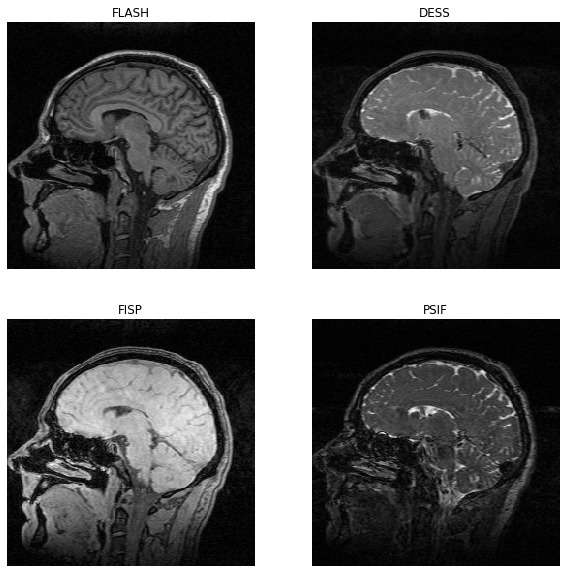

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
ax = axes.ravel()

for i, im in enumerate(images):
    ax[i].imshow(im, cmap='gray')
    ax[i].set_title(channels[i])
    ax[i].axis('off')

plt.show()